# Possibly-gapped Histogram of Iris Data

*Feb, 2017 by Kanglong Wu*

**Iris Data is built-in in R.** _It is from [this webpage](https://archive.ics.uci.edu/ml/datasets/Iris) of UCI Machine Learning Repository. Or you can download its CSV file from the "data" folder [here](https://github.com/wklchris/Reports)._ 

## Read the data

Iris data has 5 features (columns), which are: 

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    - Setosa 
    - Versicolour 
    - Virginica
    
Use the object "iris" to access the data directly.

In [1]:
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


### Build the tree

We can build 4 trees based on sepal/petal length/width. 

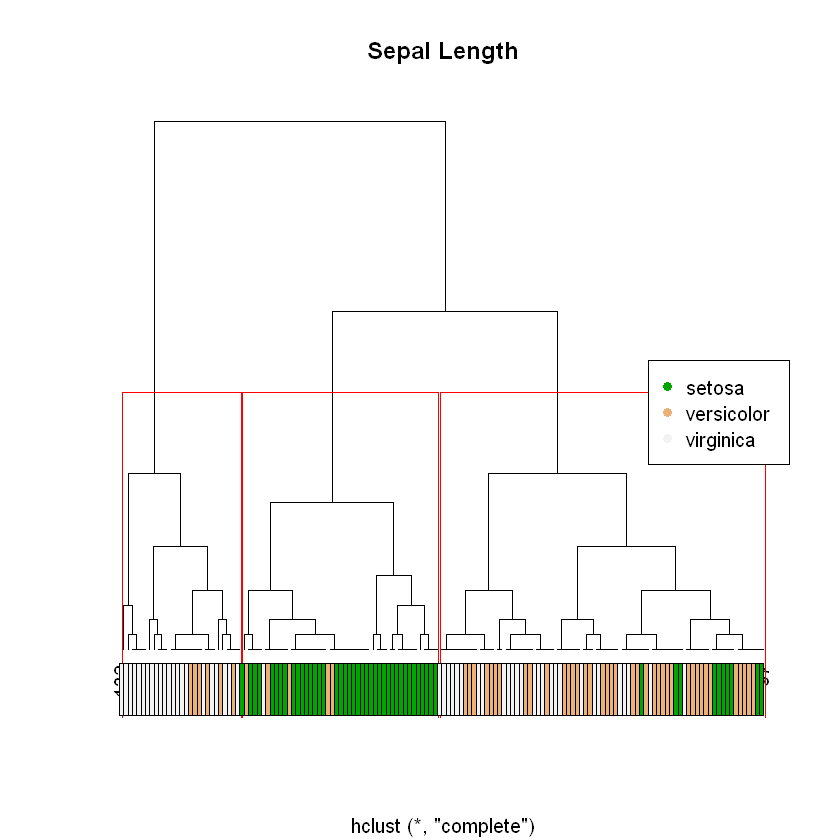

In [2]:
plot.tree <- function(vector, species=iris$Species, num=3, title="", dist_method="euclidean", cl_method="complete") {
    # Plot a hierarchical tree based on 1-feature data. 
    # 
    # Args:
    #     vector: One-column data.
    #     species: A factor.
    #     num: Number of clusters.
    #     title: The title of figure.
    #     dist_method: Method of distance calculation.
    #     cl_method: Method of HC algorithm.
    #
    # Returns:
    #     Result of cluster.
    
    d <- dist(vector, method=dist_method)
    hc <- hclust(d, method=cl_method)
    
    par(fig=c(0, 1, 0, 1))
    plot(hc, hang=-1, axes=FALSE, xlab="", ylab="", main=title)
    rect.hclust(hc, k=num)
    legend("right", names(table(iris$Species)), pch=16, col=terrain.colors(num))
    
    par(fig=c(0, 1, 0, 0.33), new=TRUE)
    plot(c(1, length(vector)), c(0, 1), type="n", axes=F, xlab="", ylab="", main="")
    # rect(seq(1,150)-1, 0, seq(1, 150), 1, col=terrain.colors(num)[cutree(hc, k=num)[hc$order]])
    rect(seq(1,length(vector))-1, 0, seq(1,length(vector)), 1, col=terrain.colors(num)[factor(species)[hc$order]])
    
    return(hc)
}

iris.SL <- plot.tree(iris$Sepal.Length, num=3, title="Sepal Length")